In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
sb.set()

In [105]:
Prices = pd.read_excel("Assign1Data.xlsx") #importing data

### Data Wrangling 

In [106]:
Prices['Month']=Prices['Date'].dt.month_name() #creating column on months for grouping
Prices['Year']=Prices['Date'].apply(lambda x:x.year) #creating column for year for grouping
Prices.set_index(['Year', 'Month']) #sorts and organizes by year and month
#calculating returns
Prices['Ret_GSPTSE']=Prices['GSPTSE'].pct_change()
Prices['Ret_Bell']=Prices['Bell'].pct_change()
Prices['Ret_Shopify']=Prices['Shopify'].pct_change()
Prices['Ret_Sunlife']=Prices['Sunlife'].pct_change()

#creates new dataframe with returns
Ret = Prices.filter(['Date','Year', 'Month','Ret_GSPTSE','Ret_Bell', 'Ret_Shopify', 'Ret_Sunlife'])

### Statistics
#### The following statistics are all calculated using all 5 years worth of data

Question 2a

In [107]:
list = ['Ret_GSPTSE','Ret_Bell', 'Ret_Shopify', 'Ret_Sunlife'] #defining list of return names so I can iterate over them
temp = 'The standard deviation and expected return for '

for x in list:
    print(temp + x + ' is ' + str(Ret[x].std()*(np.sqrt(12))) + ' and ' + str(Ret[x].mean()*(12)))

The standard deviation and expected return for Ret_GSPTSE is 0.14990127254408317 and 0.056437251457335066
The standard deviation and expected return for Ret_Bell is 0.12184616580563949 and 0.07040229344612842
The standard deviation and expected return for Ret_Shopify is 0.5083789430147718 and 0.37999833369928604
The standard deviation and expected return for Ret_Sunlife is 0.17363006556668975 and 0.08438751502196165


The pairwise correlation matrix of each company

In [108]:
Prices.filter(['Ret_GSPTSE','Ret_Bell', 'Ret_Shopify', 'Ret_Sunlife']).corr()

,Ret_GSPTSE,Ret_Bell,Ret_Shopify,Ret_Sunlife
Ret_GSPTSE,1.000000,0.499366,0.454410,0.798241
Ret_Bell,0.499366,1.000000,0.153074,0.376516
Ret_Shopify,0.454410,0.153074,1.000000,0.328549
Ret_Sunlife,0.798241,0.376516,0.328549,1.000000


#### The following statistics are estimated using only the most recent 3 years of data i.e. 2019, 2020, 2021, 2022
Question 2b

In [109]:
Ret_3y =Ret.query("Year==[2019,2020,2021,2022]") #pulls rows whose Year value matches what is inside the list
for x in list:
    print(temp + x + ' is ' + str(Ret_3y[x].std()*(np.sqrt(12))) + ' and ' + str(Ret_3y[x].mean()*12))

The standard deviation and expected return for Ret_GSPTSE is 0.16178024119028 and 0.10248379517412573
The standard deviation and expected return for Ret_Bell is 0.11086956603540624 and 0.10143562751293603
The standard deviation and expected return for Ret_Shopify is 0.5477900372618755 and 0.3743961125110676
The standard deviation and expected return for Ret_Sunlife is 0.19018366829914668 and 0.12464142816274805


The pairwise correlation matrix of each company

In [7]:
Ret_3y.filter(['Ret_GSPTSE','Ret_Bell', 'Ret_Shopify', 'Ret_Sunlife']).corr()

,Ret_GSPTSE,Ret_Bell,Ret_Shopify,Ret_Sunlife
Ret_GSPTSE,1.000000,0.537169,0.478303,0.795209
Ret_Bell,0.537169,1.000000,0.189295,0.393983
Ret_Shopify,0.478303,0.189295,1.000000,0.314626
Ret_Sunlife,0.795209,0.393983,0.314626,1.000000


### Plots
#### Question 2c

In [ ]:
Ret_halfy=Prices.filter(['Date','Ret_GSPTSE','Ret_Bell', 'Ret_Shopify','Ret_Sunlife'])

In [126]:
for x in list:
    print(temp + x + ' is ' + str(Ret[x].std()*(np.sqrt(6))) + ' and ' + str(Ret[x].mean()*6))

The standard deviation and expected return for Ret_GSPTSE is 0.10599620632441403 and 0.028218625728667533
The standard deviation and expected return for Ret_Bell is 0.08615825010274811 and 0.03520114672306421
The standard deviation and expected return for Ret_Shopify is 0.35947819801819453 and 0.18999916684964302
The standard deviation and expected return for Ret_Sunlife is 0.12277499678007119 and 0.042193757510980825


### Scatter Plot of Bell and GSPTSE 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


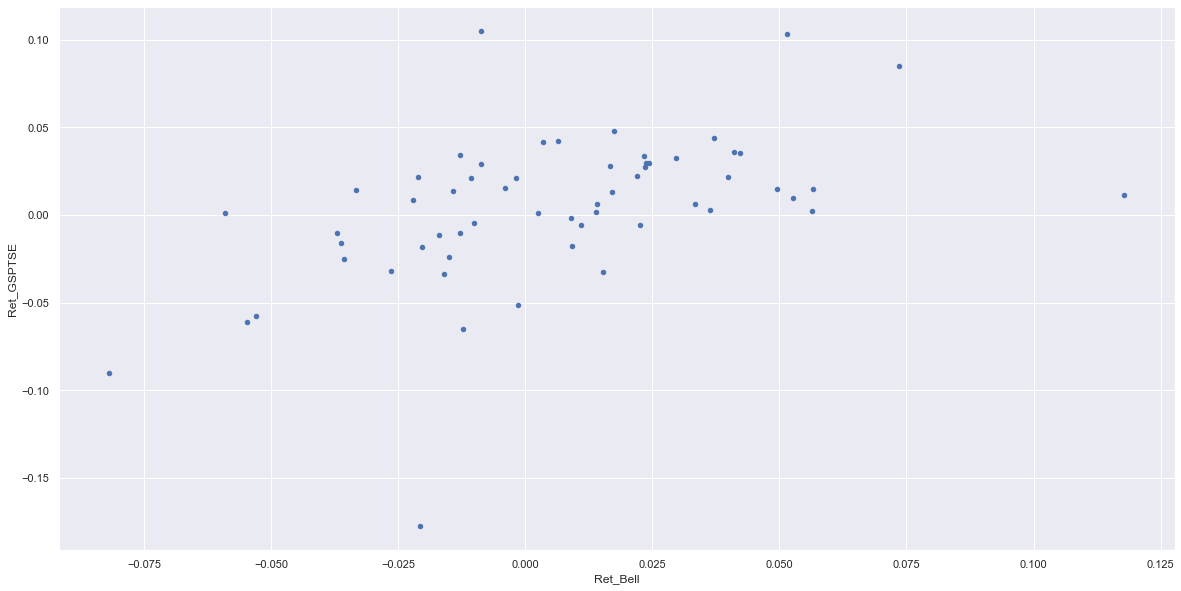

In [19]:
Ret_halfy.plot.scatter(y='Ret_GSPTSE', x='Ret_Bell', figsize=(20,10));

<ipython-input-76-99d560a32052>:7: RuntimeWarning: invalid value encountered in sqrt
  temp2= np.sqrt(0.026-0.002*x*x-0.008*x*x*x*x)


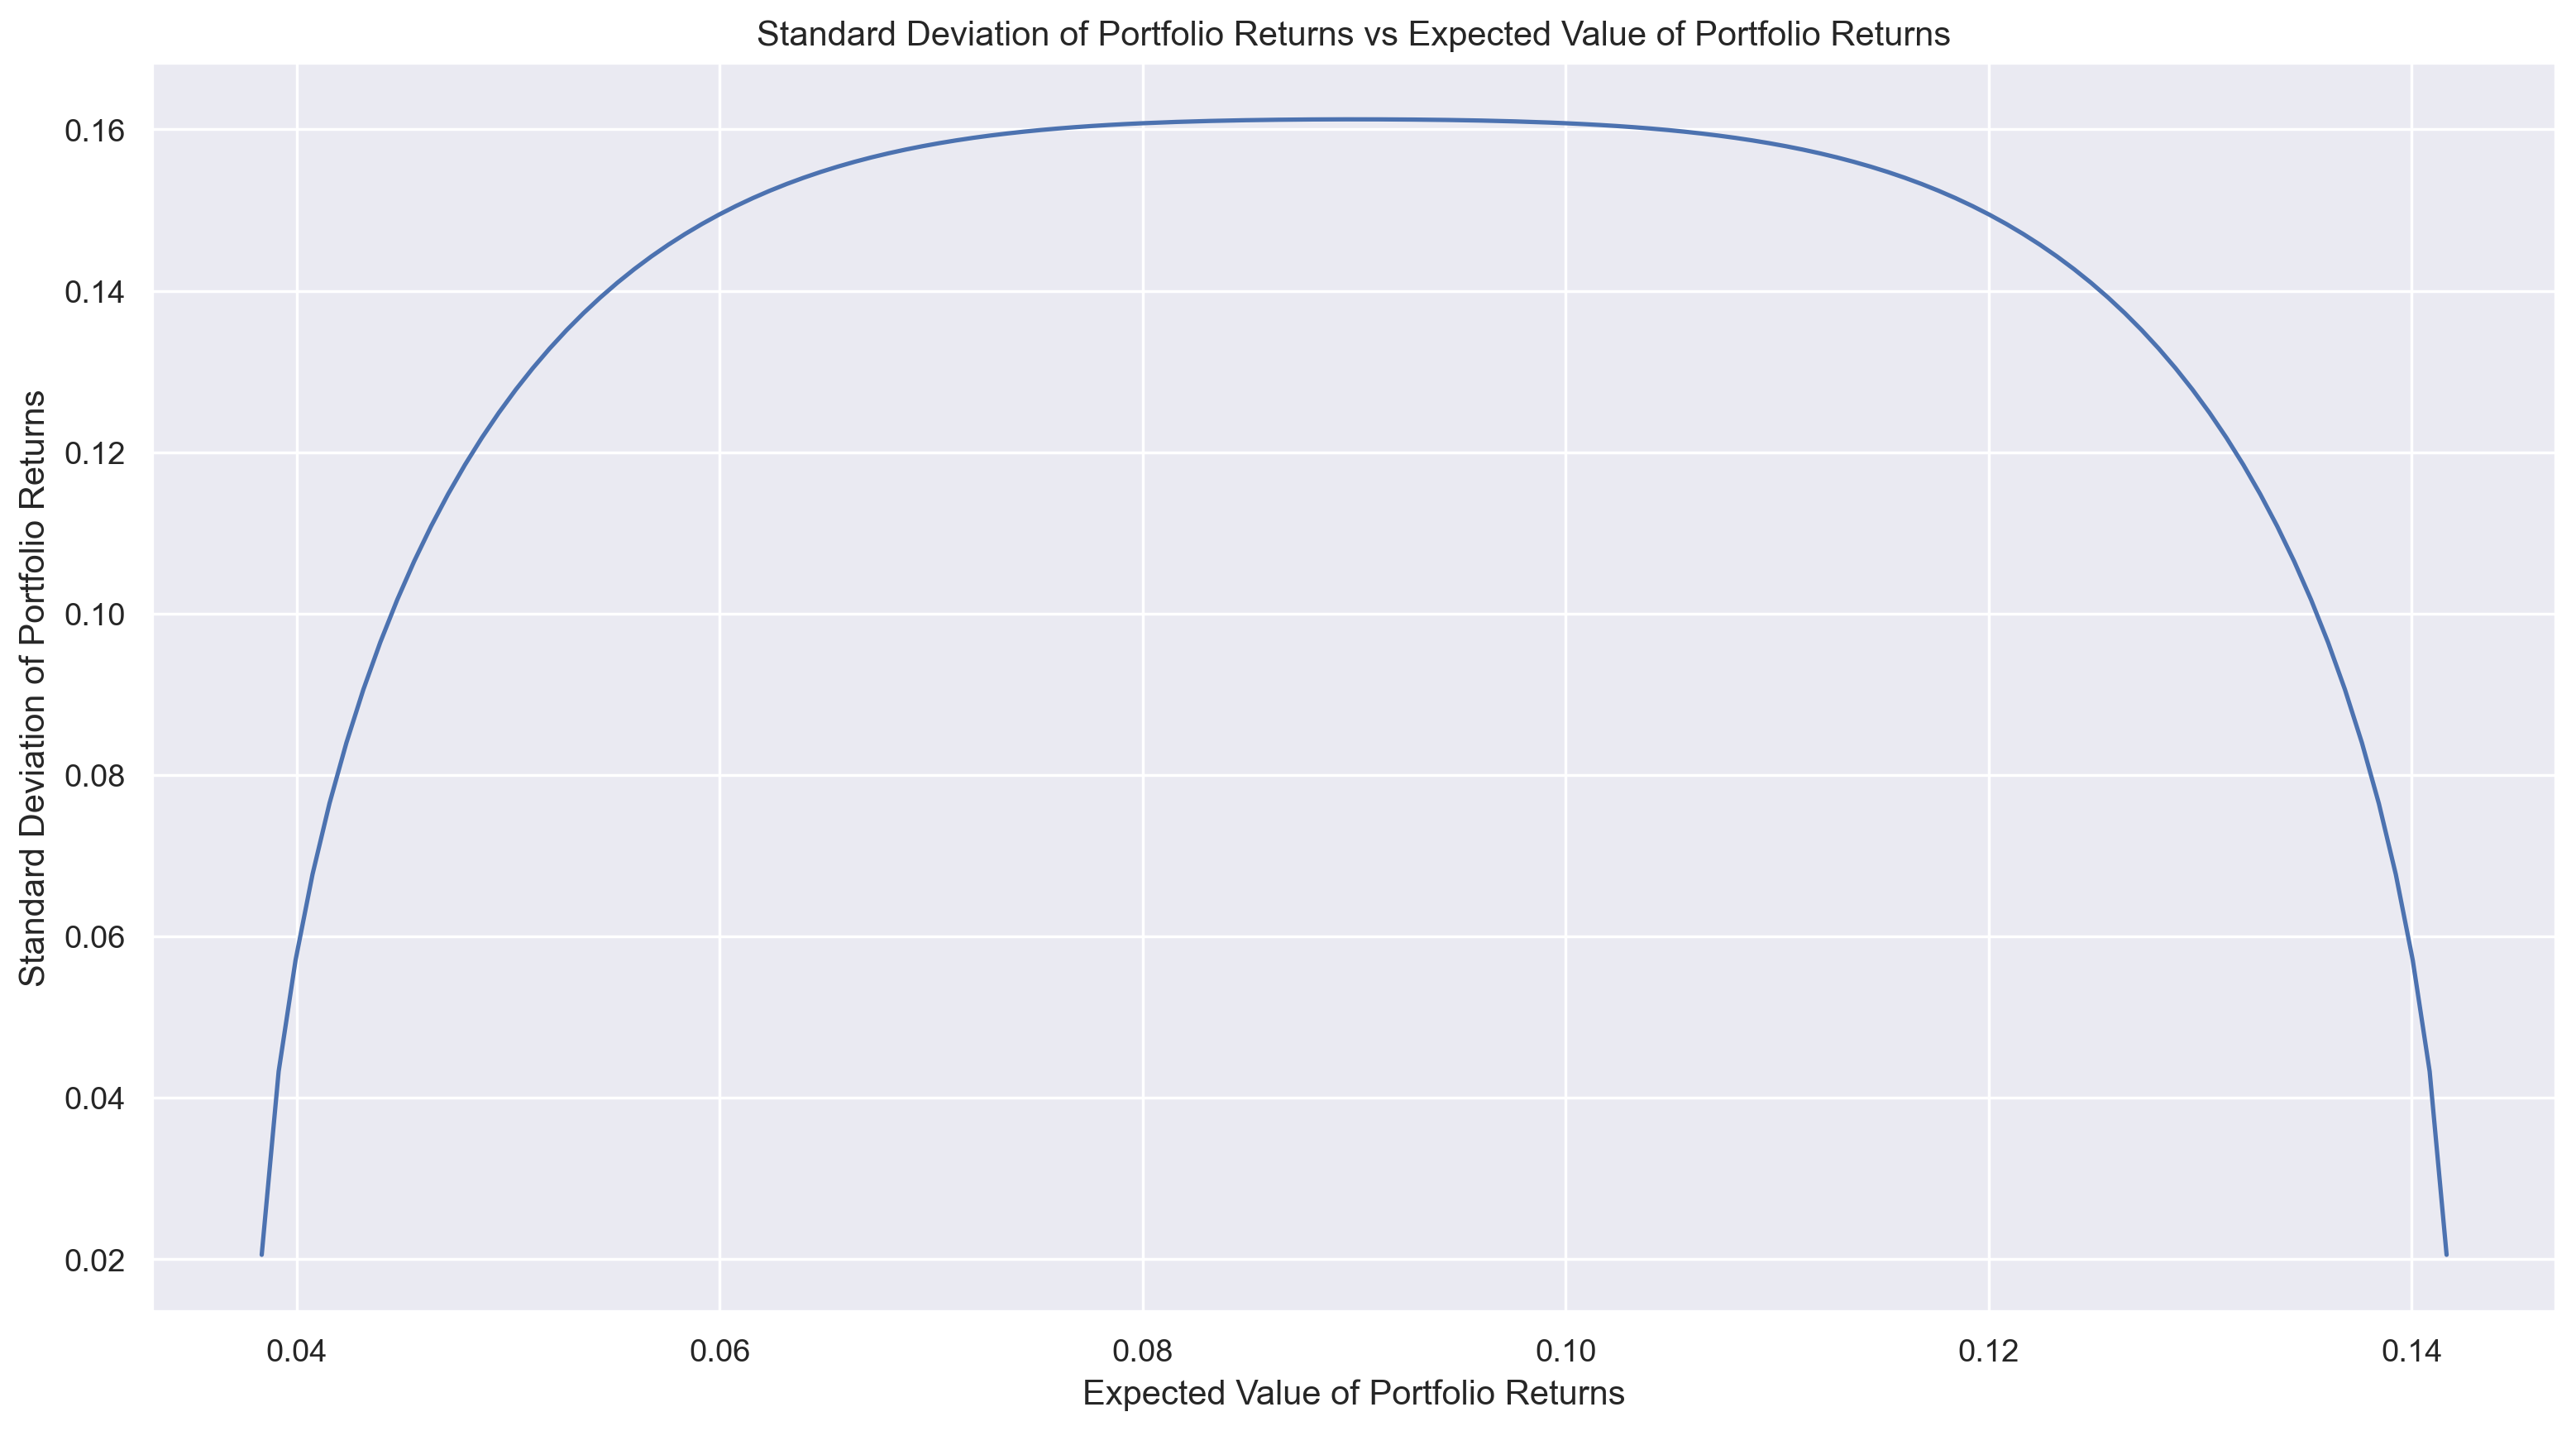

In [76]:
SDvE = pd.DataFrame()
w_b =np.linspace(-10,10,1000)
SD=[]
E=[]
for x in w_b:
    temp = 0.09 + 0.04*x
    temp2= np.sqrt(0.026-0.002*x*x-0.008*x*x*x*x)
    E.append(temp)
    SD.append(temp2)

plt.plot(E,SD);
plt.ylabel('Standard Deviation of Portfolio Returns');
plt.xlabel('Expected Value of Portfolio Returns');
plt.title('Standard Deviation of Portfolio Returns vs Expected Value of Portfolio Returns');

#### Question 2(d)i

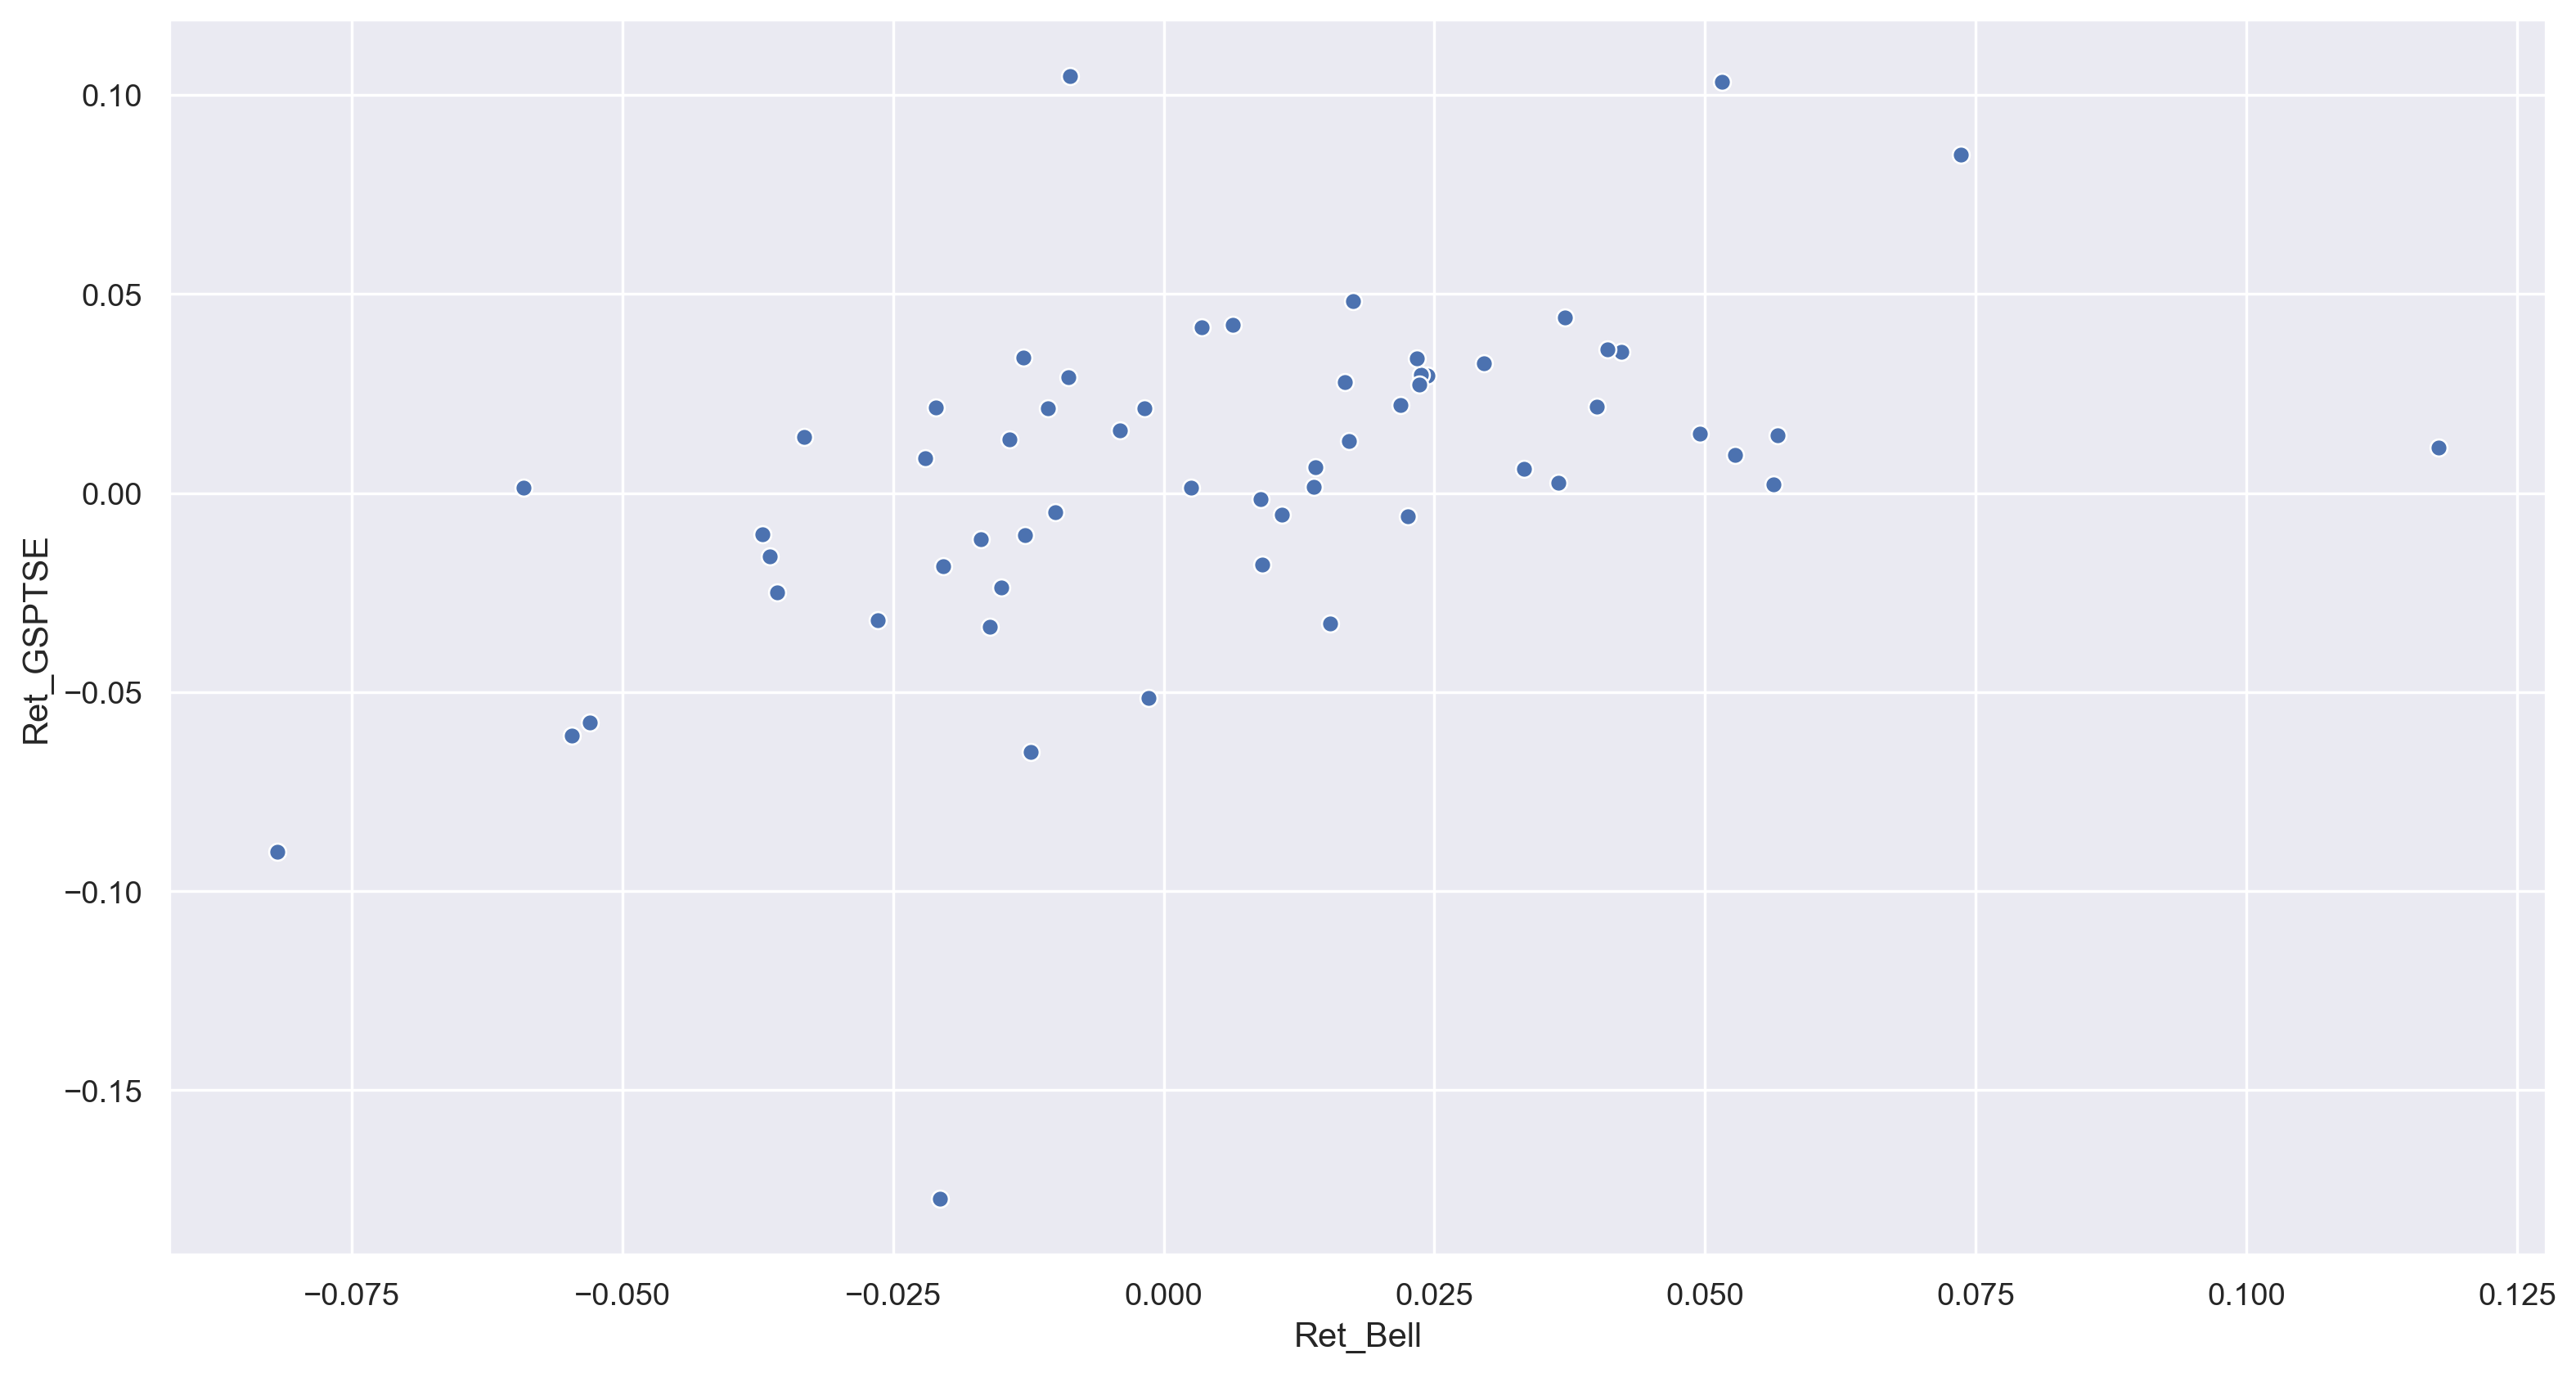

In [80]:
sb.scatterplot(y='Ret_GSPTSE', x='Ret_Bell', data=Ret_halfy, ci=None);

#### Question 2d) ii

In [ ]:
Ret.dropna(inplace=True)
Ret_3y.dropna(inplace=True)

In [122]:
#polyfit is a function that takes an x and y variable, in that order and performs a regression. deg is the power of the polynomial
reg_5y=np.polyfit(Ret['Ret_GSPTSE'],Ret['Ret_Shopify'], deg=1) 
reg_3y=np.polyfit(Ret_3y['Ret_GSPTSE'],Ret_3y['Ret_Shopify'], deg=1)

print("Shopify's beta for 5 and 3 years of data, respectively, is " + str(reg_5y[0]) + ' and '+ str(reg_3y[0]))

Shopify's beta for 5 and 3 years of data, respectively, is 1.5410962618511326 and 1.619539344491749


In [123]:
reg_5y

array([1.54109626, 0.02441859])

#### Question 2d) iii

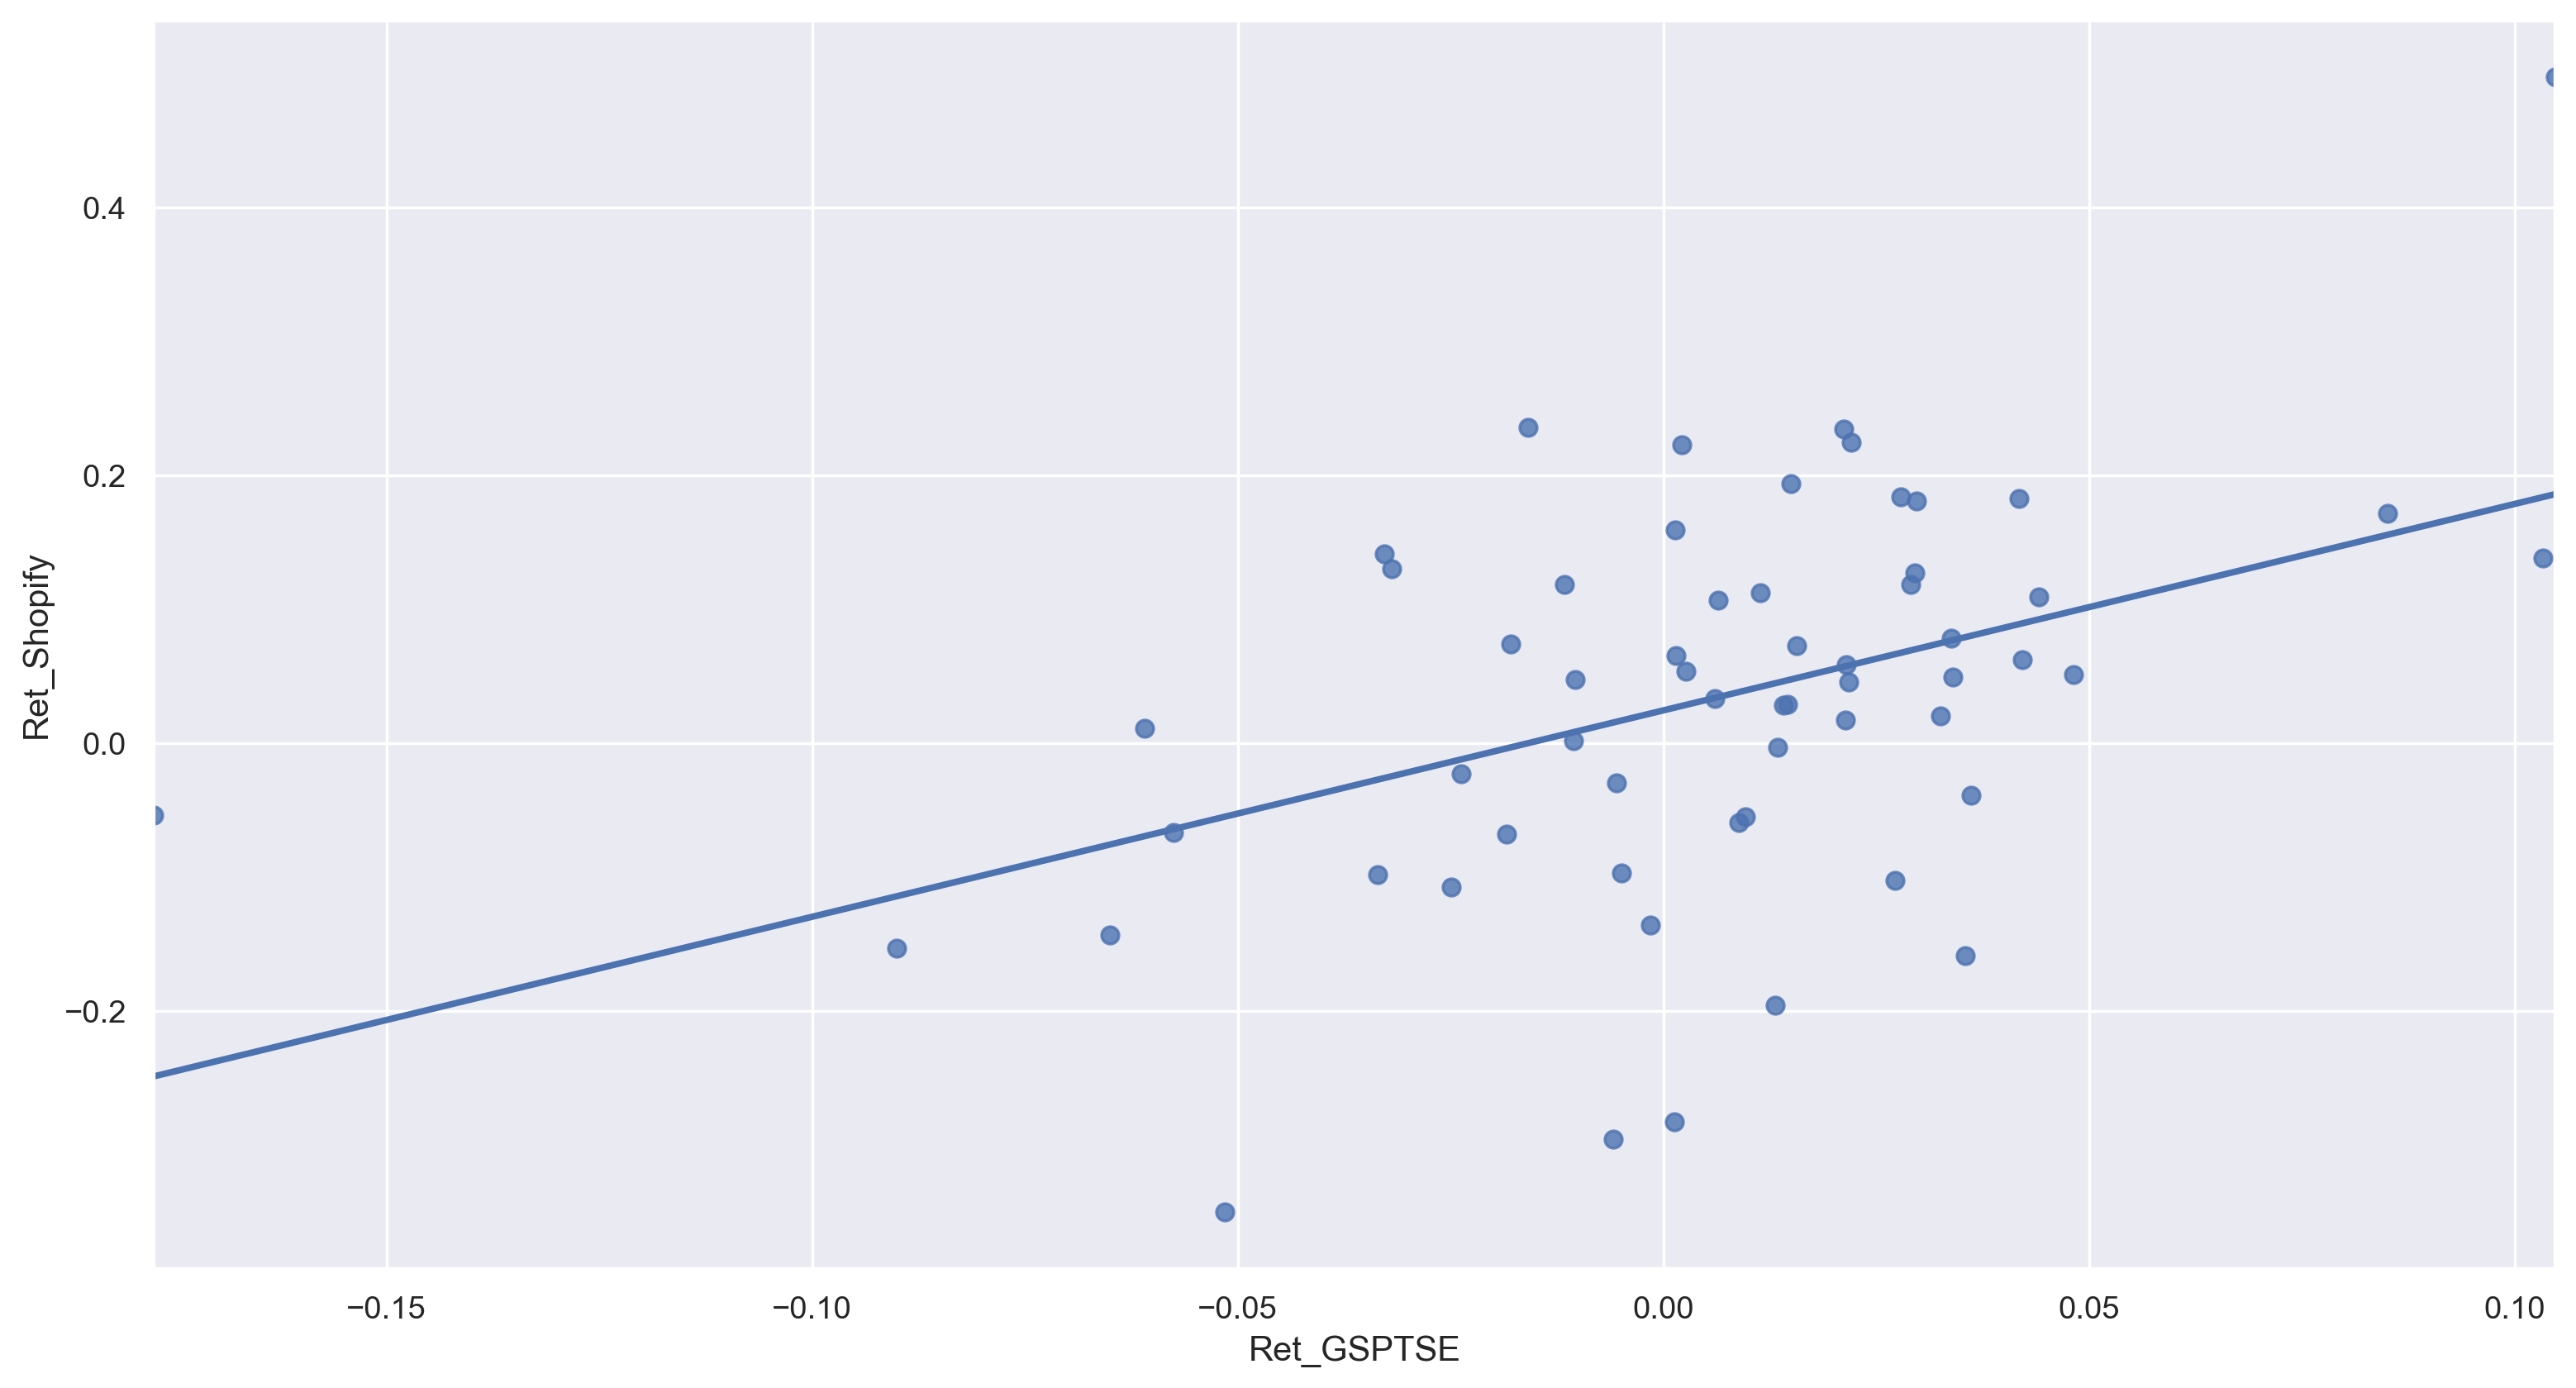

In [119]:
sb.regplot(x='Ret_GSPTSE', y='Ret_Shopify', data=Ret, ci=None);